# Scalability Model (Storage Targets)

__28/06/2021__

## Storage Targets Test #08

- 8 computing nodes
- 8 clients (processes) per node.
- 8 storage targets.

In [1]:
# import sys  
# sys.path.insert(0, '/home/luan/Devel/luan-teylo/code/')

# from commons import csv, charts
# import pandas as pd

# dfa = csv.load_ior('csv/old/output.csv')
# dft = cmm.load_tracker_csv('csv/old/tracker.csv')

# # Create a new dataframe with the targets and the bandwidth
# columns  = ['target1', 'target2', 'target3','target4', 'target5', 'target6', 'target7', 'target8']

# df = pd.DataFrame()
# df['bw'] = dfa['bw']
# df['targets'] = dft['targets']
# df['start'] = dfa['start']

# df[columns] = dft[columns]

# charts.bw_single_histogram(df, bins=20)
# print(f"Mean Bandwidth: {df['bw'].mean(): .2f} +/- {df['bw'].std(): .2f}")

# # Group storage targets to see how the allocation affects the BW
# grouped = df.groupby(columns).agg({'bw': ['count', 'mean', 'min', 'max']})

# # grouped_multiple.columns = ['bw_mean', 'bw_min', 'bw_max']
# grouped = grouped.reset_index()
# grouped

# re-execution

__15/07/2021__

In [2]:
import sys  
sys.path.insert(0, '/home/luan/Devel/luan-teylo/code/')

from commons import csv, charts
import pandas as pd
dfa = csv.load_ior('csv/output2.csv')
dft = cmm.load_tracker_csv('csv/tracker.csv')
n_targets=8

In [3]:
t0 = dft['ctime'][0]
dft['ctime'] = dft['ctime'].apply(lambda x: (x - t0))

In [4]:
# Create a new dataframe with the targets and the bandwidth
columns  = ['target1', 'target2', 'target3', 'target4', 'target5', 'target6', 'target7', 'target8', 'ctime']

df = pd.DataFrame()
df['bw'] = dfa['bw']
df['start'] = dfa['start']
df['end'] = dfa['end']
df['targets'] = dft['targets']
df[columns] = dft[columns]

In [5]:
dk = df[:]

x = dk['ctime'].values.reshape((-1, 1))
y = dk['bw'].values.reshape((-1, 1))

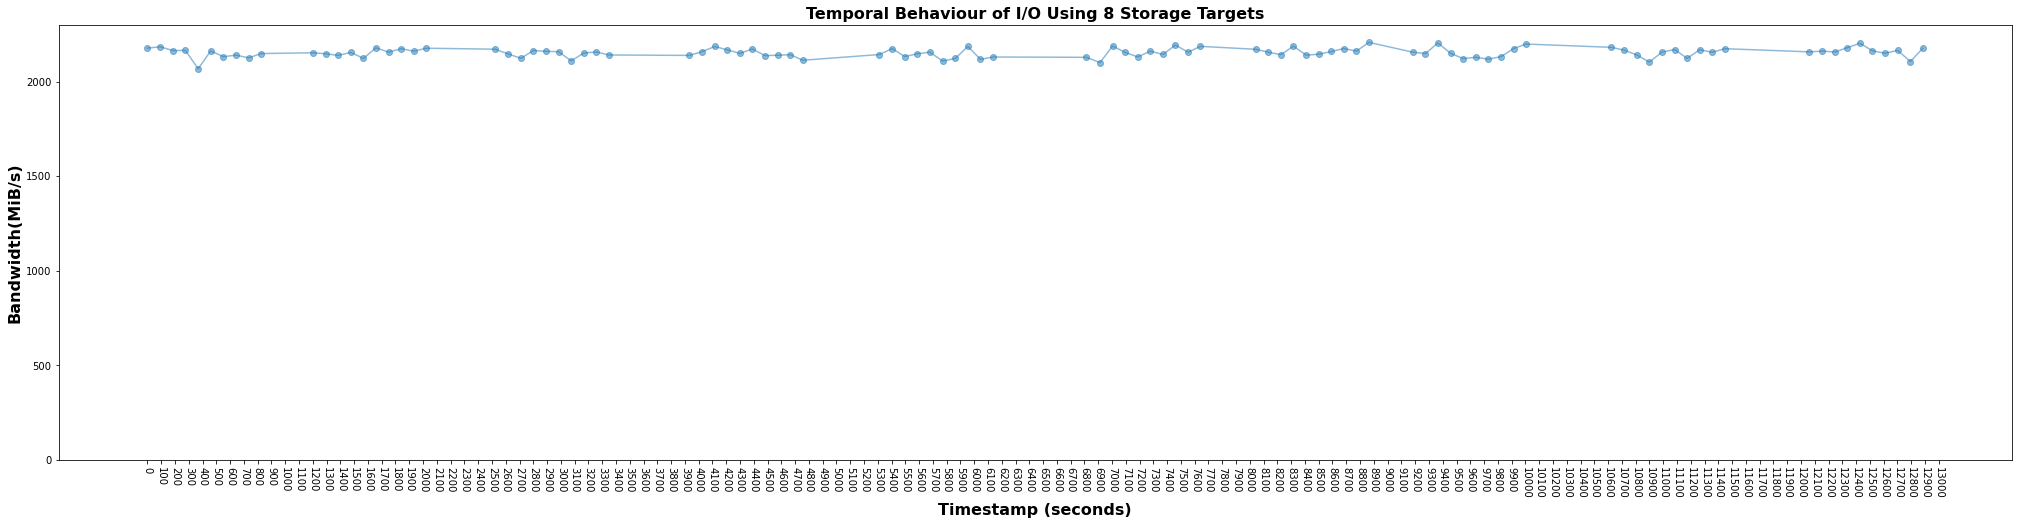

In [6]:
# %matplotlib notebook
from commons import csv, charts
from numpy import array, linspace
import numpy as np
import matplotlib.pyplot as plt
import math


fig, ax = plt.subplots()
fig.set_size_inches(35.0, 8, forward=True)

plt.plot(x, y, 'o-', alpha=0.5)

plt.xticks(range(0, 13100, 100))
plt.xticks(rotation=-90)

plt.ylabel('Bandwidth(MiB/s)',fontweight ='bold', fontsize=16)
plt.xlabel('Timestamp (seconds)', fontweight ='bold', fontsize=16)
plt.title(f"Temporal Behaviour of I/O Using {n_targets} Storage Targets", fontweight ='bold', fontsize=16)

# plt.rcParams["figure.figsize"] = [35.0, 8.0]
# plt.rcParams["figure.autolayout"] = True


plt.ylim([0, 2300])

# plt.grid()
# fig.savefig(f'../graph/{n_targets}st.pdf', format='pdf', dpi=1200)  

plt.show()

In [7]:
g_columns = ['target1', 'target2', 'target3', 'target4', 'target5', 'target6', 'target7', 'target8']
grouped_multiple = df.groupby(g_columns).agg({'bw': ['count','mean', 'min', 'max']})
grouped_multiple.columns = ['bw_count','bw_mean', 'bw_min', 'bw_max']
grouped_multiple = grouped_multiple.reset_index()
grouped_multiple

target1 target2 target3 target4 target5 target6 target7 target8  bw_count  \
0     101     102     103     104     201     202     203     204       100   

     bw_mean   bw_min   bw_max  
0  2153.9573  2068.49  2208.45

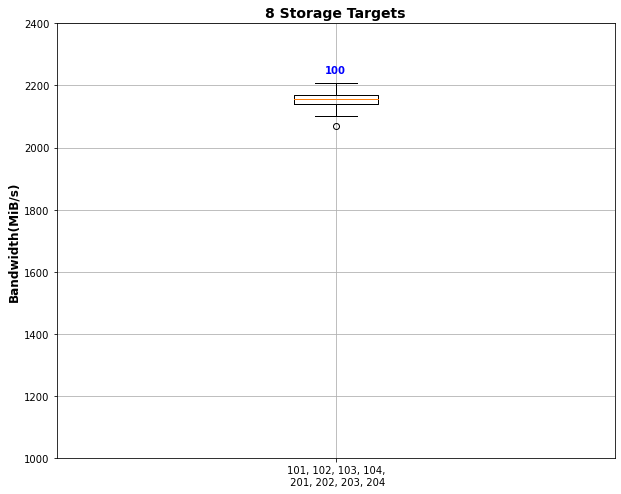

In [9]:
n_targets = 8


xlabels = ['101, 102, 103, 104,\n 201, 202, 203, 204']

dframes = [df]

cmm.boxplot(xlabels=xlabels, values=[d['bw'].values for d in dframes], 
            title=f"{n_targets} Storage Targets",
            ylabel='Bandwidth(MiB/s)',
            xlabel='',
            save_to=f'../graphs/boxplot/{n_targets}_boxplot.pdf',
            ylim=[1000,2400],
            rotation_x=0.0,
            dframes=dframes,
           plot_obs=True)
